In [49]:
import pandas
from scipy import stats

country = pandas.read_csv("countries.csv")
country.head()

,Country Name,Country,Euro
0,Belgium,BE,1
1,Greece,EL,1
2,Lithuania,LT,1
3,Portugal,PT,1
4,Bulgaria,BG,0


In [50]:
inflace = pandas.read_csv("ukol_02_a.csv")
inflace.head()

,Country,98,97
0,BE,31,34
1,BG,22,31
2,CZ,34,42
3,DK,28,33
4,D-W,33,40


Test normality obou skupin dat

In [51]:
from scipy import stats

res_1 = stats.shapiro(inflace["97"])
res_1


ShapiroResult(statistic=0.9694532752037048, pvalue=0.33090925216674805)

In [52]:
res_2 = stats.shapiro(inflace["98"])
res_2

ShapiroResult(statistic=0.9803104996681213, pvalue=0.687289297580719)

Inflace

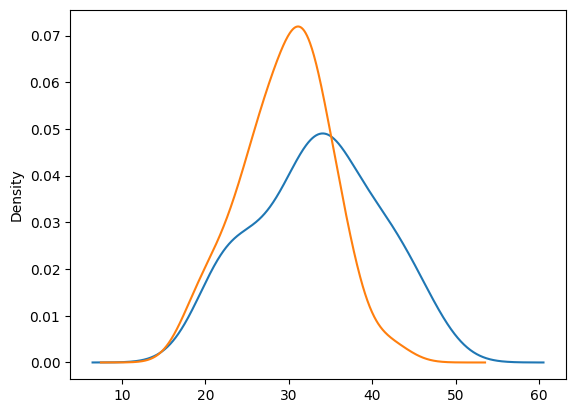

In [53]:
import matplotlib.pyplot as plt

inflace["97"].plot.kde()
inflace["98"].plot.kde()
plt.show()


Data mají normální rozdělení, tedy se potvrdila nulová hypotéza (p-hodnota je nad 5%), vhodnější bude parametrický test.

Formulace hypotéz testu

Nulová hypotéza - počet lidí, kteří řadí inflaci za svůj nejzávažnější problém v roce 97 je stejný jako v roce 98  
Alternativní hypotéza - počet lidí, kteří řadí inflaci za svůj nejzávažnější problém v roce 97 je jižný než v roce 98 

Můžeme použít párový t-test:

In [54]:
data = pandas.DataFrame(inflace, columns=["97", "98"])
res = stats.ttest_rel(inflace["97"], inflace["98"])
res


TtestResult(statistic=3.868878598419143, pvalue=0.0003938172257904746, df=40)

Formulace výsledek testu (na základě p-hodnoty):

Zamítáme nulovou hypotézku. Neprokázali jsme, že by počet lidí, kteří za svůj nejzávažnější problém v roce 97 a v roce 98 byl stejný.

Důvěra ve stát a v EU

In [55]:
duvera = pandas.read_csv("ukol_02_b.csv")
duvera.head()


,Country,National Government Trust,EU Trust
0,BE,40,55
1,BG,19,49
2,CZ,30,43
3,DK,52,65
4,D-W,54,53


In [56]:
cd_joined = pandas.merge(country, duvera, on=["Country"])
cd_joined.head()

,Country Name,Country,Euro,National Government Trust,EU Trust
0,Belgium,BE,1,40,55
1,Greece,EL,1,22,37
2,Lithuania,LT,1,36,69
3,Portugal,PT,1,45,68
4,Bulgaria,BG,0,19,49


In [57]:
cd_joined_1 = cd_joined[cd_joined["Euro"] == 1]
cd_joined_1.head()

,Country Name,Country,Euro,National Government Trust,EU Trust
0,Belgium,BE,1,40,55
1,Greece,EL,1,22,37
2,Lithuania,LT,1,36,69
3,Portugal,PT,1,45,68
5,Spain,ES,1,23,50


Test normality obou skupin dat

In [58]:
res_3 = stats.shapiro(cd_joined_1["National Government Trust"])
res_3

ShapiroResult(statistic=0.9250009059906006, pvalue=0.15850234031677246)

In [59]:
res_4 = stats.shapiro(cd_joined_1["EU Trust"])
res_4

ShapiroResult(statistic=0.9644785523414612, pvalue=0.6897867321968079)

Data mají normální rozdělení, tedy se potvrdila nulová hypotéza (p-hodnota je nad 5%), vhodnější bude parametrický test.

Formulace hypotéz testu

Nulová hypotéza - důvěra v národní vládu a důvěra v EU nejsou statisticky závislé 
Alternativní hypotéza - důvěra v národní vládu a důvěra v EU jsou statisticky závislé

Volba vhodného testu

In [71]:
from scipy import stats
res_5 = stats.pearsonr(cd_joined_1["EU Trust"], cd_joined_1["National Government Trust"])
res_5



PearsonRResult(statistic=0.6462798438911764, pvalue=0.00375677473040814)

Neprokázala se nulová hypotéza. Důvěra v národní vládu a v EU nejsou statisticky závislé.

Důvěra v EU a euro

In [63]:
cd_joined_2 = cd_joined[cd_joined["Euro"] == 0]
cd_joined_2.head()

,Country Name,Country,Euro,National Government Trust,EU Trust
4,Bulgaria,BG,0,19,49
7,Romania,RO,0,27,54
8,Czechia,CZ,0,30,43
10,Hungary,HU,0,48,56
12,Denmark,DK,0,52,65


Formulace hypotéz testu

Nulová hypotéza - důvěra v EU v eurozoně je stejná jako ve státech mimo EU
Alternativní hypotéza - důvěra v EU v eurozoně není stejná jako ve státech mimo EU.

In [73]:
res_6 = stats.kruskal(cd_joined_1["EU Trust"], cd_joined_2["EU Trust"])
res_6

KruskalResult(statistic=0.08022235822113498, pvalue=0.7769963037674541)

Nepotvrdila se nulová hypotéza. 